In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf

In [4]:
# Carregar o conjunto de dados Fashion MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalizar as imagens (escala de 0 a 1, dividindo por 255 que seria o numero maximo, ficando cor cinza)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Verificar as dimensões do conjunto de treinamento
print("x_train.shape:", x_train.shape)


x_train.shape: (60000, 28, 28)


In [6]:
import numpy as np

# Expandir a dimensão para adicionar o canal (1 para escala de cinza)
x_train = np.expand_dims(x_train, -1)  
x_test = np.expand_dims(x_test, -1)    

# Verificar as novas formas das imagens
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)


x_train.shape: (60000, 28, 28, 1)
x_test.shape: (10000, 28, 28, 1)


In [8]:
K = len(set(y_train))
print("numero de classes: ", K)

numero de classes:  10


In [10]:
#adcionei a camada de batchnormalization e mudei alguns valores das camadas
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout, BatchNormalization, Activation

# Entrada com shape das imagens (28, 28, 1)
i = Input(shape=x_train[0].shape)

# Primeira camada convolucional
x = Conv2D(32, (3, 3), strides=2, padding='same')(i)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Segunda camada convolucional
x = Conv2D(64, (3, 3), strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Terceira camada convolucional
x = Conv2D(128, (3, 3), strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Achatar e adicionar camadas densas
x = Flatten()(x)
x = Dropout(0.3)(x)  # Aumentei o dropout para maior regularização
x = Dense(256, activation='relu')(x)  # Reduzi o número de neurônios
x = Dropout(0.4)(x)  # Taxa de dropout ajustada
x = Dense(K, activation='softmax')(x)

# Criar o modelo
model = Model(i, x)

# Exibir o resumo do modelo
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 620,682 (2.37 MB)

 Trainable params: 620,234 (2.37 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.7810 - loss: 0.6310 - val_accuracy: 0.8738 - val_loss: 0.3421
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.8757 - loss: 0.3372 - val_accuracy: 0.8856 - val_loss: 0.3130
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.8919 - loss: 0.2927 - val_accuracy: 0.8946 - val_loss: 0.2864
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9067 - loss: 0.2533 - val_accuracy: 0.9038 - val_loss: 0.2658
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9138 - loss: 0.2302 - val_accuracy: 0.9091 - val_loss: 0.2534
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9218 - loss: 0.2077 - val_accuracy: 0.9142 - val_loss: 0.2463
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9279 - loss: 0.1928 - val_accuracy: 0.9119 - val_loss: 0.2587
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9323 -

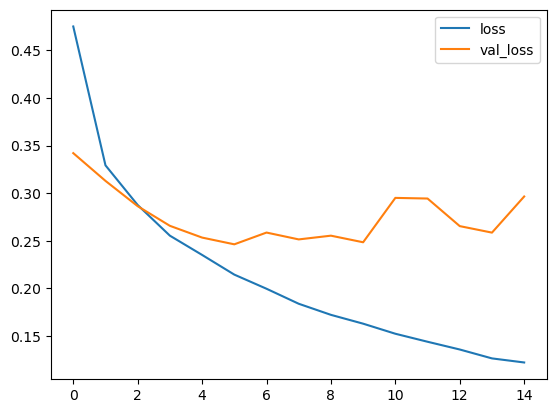

In [ ]:
plt.plot(r.history["loss"], label="loss")  # Plota a curva de perda de treinamento usando os valores armazenados em r.history["loss"]
plt.plot(r.history["val_loss"], label="val_loss")  # Plota a curva de perda de validação usando os valores armazenados em r.history["val_loss"]
plt.legend()  

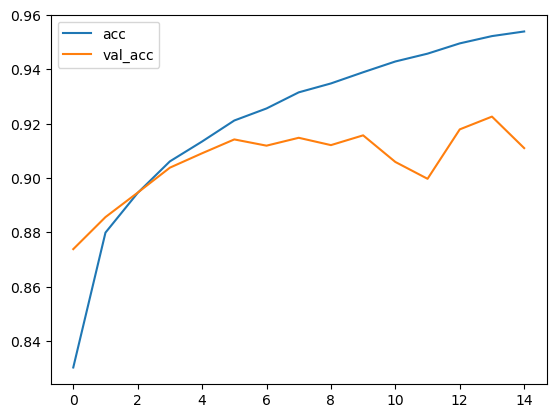

In [ ]:
plt.plot(r.history["accuracy"], label="acc")  # Plota a curva de acurácia de treinamento usando os valores armazenados em r.history["accuracy"]
plt.plot(r.history["val_accuracy"], label="val_acc")  # Plota a curva de acurácia de validação usando os valores armazenados em r.history["val_accuracy"]
plt.legend()  